# Métodos Conservativos - Tarea 4
 
### Punto 2 - Advección:

Evolucionaremos la ecuación de advección 
\begin{equation}
u_t = c u_x
\end{equation}
con los dos métodos conservativos introducidos para este practico.  Los compararemos entre sí y con lo obtenido con diferencias finitas de orden 4

In [1]:
using OrdinaryDiffEq
using Plots
using LinearAlgebra
using BandedMatrices
using SparseArrays

In [2]:
include("choques_utils.jl")

createMP5auxvectors (generic function with 1 method)

In [3]:
problem = :advection

:advection

#### KurganovTadmor

In [4]:
#KurganovTadmor = false
#MonotonicityPreserving5 =  true
KurganovTadmor = true
MonotonicityPreserving5 =  false

false

In [5]:
function advectionspeed(U, c)
    return abs(c)
end

function burgersspeed(U, c)
    return maximum(abs, U)  #no encuentro forma de escribir esto sin que aloque memoria...
end

if problem == :advection
    SpeedMax = advectionspeed
elseif problem == :burgers
    SpeedMax = burgersspeed
end

advectionspeed (generic function with 1 method)

In [6]:
function advection!(F, U, c)
    @. F = c*U
end

function burgers!(F, U, Fpars)
    @. F = 0.5*U*U
end

if problem == :advection
    Flux_x! = advection!
elseif problem == :burgers
    Flux_x! = burgers!
end

advection! (generic function with 1 method)

In [7]:
N = 2000
N_FIELDS = 1

#Datos espaciales para el problema
#start = 0.0
#stop = 6.0
#x = range(start, stop =stop, length = N+1)[1:end-1] #de manera que no incluya el último punto
#dx = Float64(x.step)  #Δx
#h = 1.0/dx
 

L = 5.0            # Intervalo espacial
dx = L/N           # dx
x = [dx*i for i in 0:N-1];   
h = 1.0/dx

#CFL = dt/dx
CFL = 0.1
dt = dx * CFL

#Parámetros del problema
if problem == :advection
    eqpars = 1.0
elseif problem == :burgers
    eqpars = false
end

1.0

In [8]:
#Definimos el intervalo de integración y el paso dt
T = 5.0
tspan = (0.0, T)

(0.0, 5.0)

In [9]:
#Elegimos el método que queremos ver
if KurganovTadmor == true
    θ = 2.0  #Este valor tiene que estar entre 1 y 2. Mientras más cerca de 2, menor disipación.
             #Para sistemas de ecuaciones es mejor que esté más cerca de 1 para evitar oscilaciones.
    auxvectors = createKTauxvectors(N_FIELDS)
    scheme! = KT!
    par = (eqpars, h, θ, Flux_x!, SpeedMax, N, N_FIELDS, auxvectors)
    println("Elegido el método KT")
elseif MonotonicityPreserving5 == true
    auxvectors = createMP5auxvectors(N_FIELDS)
    scheme! = mp5!
    par = (eqpars, h, N, N_FIELDS, Flux_x!, SpeedMax, auxvectors)
    println("Elegido el método MP5")
end

Elegido el método KT


In [18]:
#Inicializamos el dato
u = Array{Float64}(undef, N, N_FIELDS)
du = copy(u)
#@. u[:,1] = 0.5 + sin(x)

x0 = 1.; x1 = 4.

for i in 1:N
    if x[i] > x0 && x[i] < x1
        u[i,1] = (x[i] - x0)^10 * (x[i] - x1)^10 / (x1-x0)^12 *200
       
    end
end

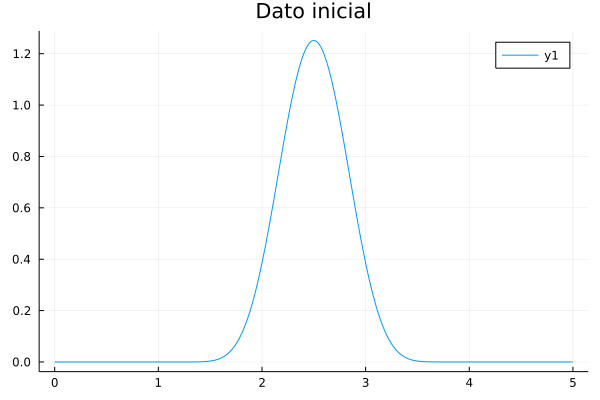

In [19]:
plot(x , u[:,1] , title= "Dato inicial")

In [20]:
probKT = ODEProblem(scheme!,u,tspan,par);

In [21]:
solKT = solve(probKT,SSPRK33(),dt=dt, saveat = T/100);

┌ Info: Saved animation to 
│   fn = C:\Users\LENOVO\CursoPDE\2021\Numericos\Tarea_4\adveccionKT.gif
└ @ Plots C:\Users\LENOVO\.julia\packages\Plots\HcxwM\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\LENOVO\\CursoPDE\\2021\\Numericos\\Tarea_4\\adveccionKT.gif")
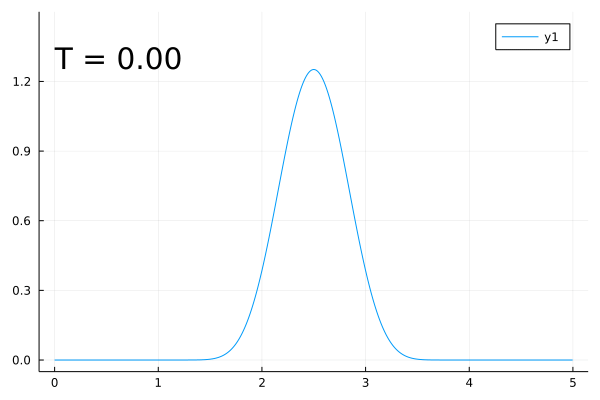

In [23]:
using Printf
anim = @animate for t in solKT.t
    plt = plot(x, solKT(t), ylims = (-0.05,1.5))
    annotate!(plt, 0.0, 1.3, text("T = $(@sprintf("%.2f", t))", :black, :left, 20))
end
gif(anim, "adveccionKT.gif", fps = 20)

In [24]:
#Definimos el intervalo de integración y el paso dt
tspancomp = (0.0, T*40)

(0.0, 200.0)

In [25]:
probKTc = ODEProblem(scheme!,u,tspancomp,par);

In [26]:
solKTc = solve(probKTc,SSPRK33(),dt=dt, saveat =5.0);

┌ Info: Saved animation to 
│   fn = C:\Users\LENOVO\CursoPDE\2021\Numericos\Tarea_4\adveccionKTc.gif
└ @ Plots C:\Users\LENOVO\.julia\packages\Plots\HcxwM\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\LENOVO\\CursoPDE\\2021\\Numericos\\Tarea_4\\adveccionKTc.gif")
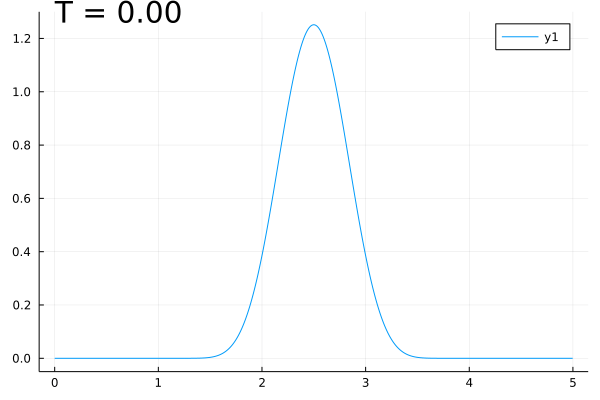

In [22]:
anim = @animate for t in solKTc.t
    plt = plot(x, solKTc(t), ylims = (-0.05,1.3))
    annotate!(plt, 0.0, 1.3, text("T = $(@sprintf("%.2f", t))", :black, :left, 20))
end
gif(anim, "adveccionKTc.gif", fps = 5)

#### MonotonicityPreserving5

In [27]:
KurganovTadmor = false
MonotonicityPreserving5 =  true
#KurganovTadmor = true
#MonotonicityPreserving5 =  false

true

In [28]:
#Elegimos el método que queremos ver
if KurganovTadmor == true
    θ = 2.0  #Este valor tiene que estar entre 1 y 2. Mientras más cerca de 2, menor disipación.
             #Para sistemas de ecuaciones es mejor que esté más cerca de 1 para evitar oscilaciones.
    auxvectors = createKTauxvectors(N_FIELDS)
    scheme! = KT!
    par = (eqpars, h, θ, Flux_x!, SpeedMax, N, N_FIELDS, auxvectors)
    println("Elegido el método KT")
elseif MonotonicityPreserving5 == true
    auxvectors = createMP5auxvectors(N_FIELDS)
    scheme! = mp5!
    par = (eqpars, h, N, N_FIELDS, Flux_x!, SpeedMax, auxvectors)
    println("Elegido el método MP5")
end

Elegido el método MP5


In [29]:
probMP5 = ODEProblem(scheme!,u,tspancomp ,par);

In [30]:
solMP5 = solve(probMP5,SSPRK33(),dt=dt, saveat = 5.0);

#### Diferencias finitas orden 4

In [31]:
function create_D_4_per(N) #Derivada primera cuarto orden
    D_4_per = BandedMatrix{Float64}(Zeros(N,N), (N-1,N-1))
    D_4_per[band(0)] .= 0.0
    D_4_per[band(1)] .= 2.0/3.0
    D_4_per[band(-1)] .= -2.0/3.0
    D_4_per[band(2)] .= -1.0/12.0
    D_4_per[band(-2)] .= 1.0/12.0
    
    D_4_per[band(N-1)] .= -2.0/3.0
    D_4_per[band(N-2)] .= 1.0/12.0
    
    D_4_per[band(-N+1)] .= 2.0/3.0
    D_4_per[band(-N+2)] .= -1.0/12.0
    
    D_4_per = sparse(D_4_per)
    dropzeros!(D_4_per)
    return D_4_per
end

create_D_4_per (generic function with 1 method)

In [32]:
D_4_per = create_D_4_per(N)

2000×2000 SparseMatrixCSC{Float64, Int64} with 8000 stored entries:
⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈
⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀
⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦

In [33]:
a=-1.
function F!(dr,r,p,t) # Funcion generica con las distintas matrices como parametro
    a,dx,D = p #D es un parametro 
    h = 1. /dx
    u = @view r[:,1]
    du = @view dr[:,1]
    mul!(du, D, u, a*h, 0.0)
end

F! (generic function with 1 method)

In [34]:
p4 = (a,dx, D_4_per);
prob4 = ODEProblem(F!,u,tspancomp,p4);

In [35]:
sol4 = solve(prob4,SSPRK33(),dt=dt,saveat=5.0);

┌ Info: Saved animation to 
│   fn = C:\Users\LENOVO\CursoPDE\2021\Numericos\Tarea_4\comp.gif
└ @ Plots C:\Users\LENOVO\.julia\packages\Plots\HcxwM\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\LENOVO\\CursoPDE\\2021\\Numericos\\Tarea_4\\comp.gif")
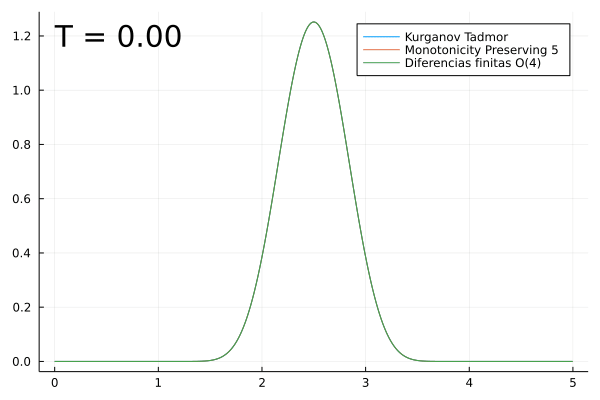

In [37]:

anim = @animate for t in solMP5.t
    plt = plot(x, solKTc(t),  label="Kurganov Tadmor")
    plot!(x, solMP5(t),label="Monotonicity Preserving 5")
   plot!(x, sol4(t), label= "Diferencias finitas O(4) ")
    annotate!(plt, 0.0, 1.2, text("T = $(@sprintf("%.2f", t))", :black, :left, 20))
end
gif(anim, "comp.gif", fps = 5)

┌ Info: Saved animation to 
│   fn = C:\Users\LENOVO\CursoPDE\2021\Numericos\Tarea_4\adveccionMP5.gif
└ @ Plots C:\Users\LENOVO\.julia\packages\Plots\HcxwM\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\LENOVO\\CursoPDE\\2021\\Numericos\\Tarea_4\\adveccionMP5.gif")
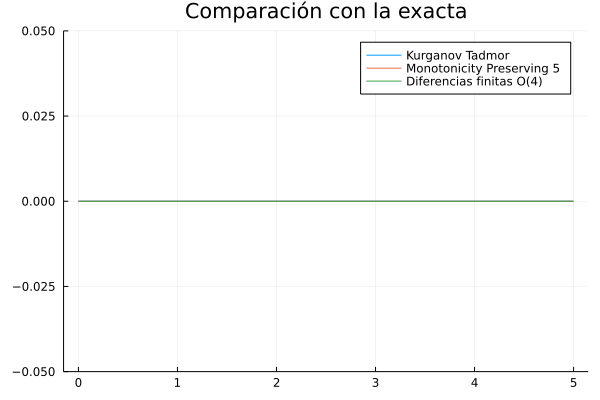

In [38]:
anim = @animate for t in solMP5.t
    plt = plot(x, solKTc(t) - u[:,1] , ylims = (-0.05,0.05), label="Kurganov Tadmor", title="Comparación con la exacta")
    plot!(x, solMP5(t)- u[:,1] ,label="Monotonicity Preserving 5")
    plot!(x, sol4(t)- u[:,1] , label= "Diferencias finitas O(4) ")
    annotate!(plt, 0.0, 1.3, text("T = $(@sprintf("%.2f", t))", :black, :left, 20))
end
gif(anim, "adveccionMP5.gif", fps = 5)

Podemos concluir lo siguiente. El método de KT recordemos que se basa en el de LF en donde podemos observar que la aproximación para la derivada tiene un término asociado con una derivada centrada y otro que se asemeja al laplaciano de la función. Ese es el término disipativo, el cual está afectando a la solución numerica. Vemos como el metodo MP5 tiene resuelto ese problema. También, comparandolos con el método de diferencia finita de orden cuarto vemos como al transcurrir varios periodos los distintos modos comienzan a viajar a distintas velocidades. Lo cual hace que la solución numerica comience a tener perturbaciones, asentuandose al transcurrir mas tiempo. Esta dificultad no la presentan los métodos de KT y MP5.